In [62]:
# importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv("student_exam_scores.csv")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [65]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [66]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [67]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


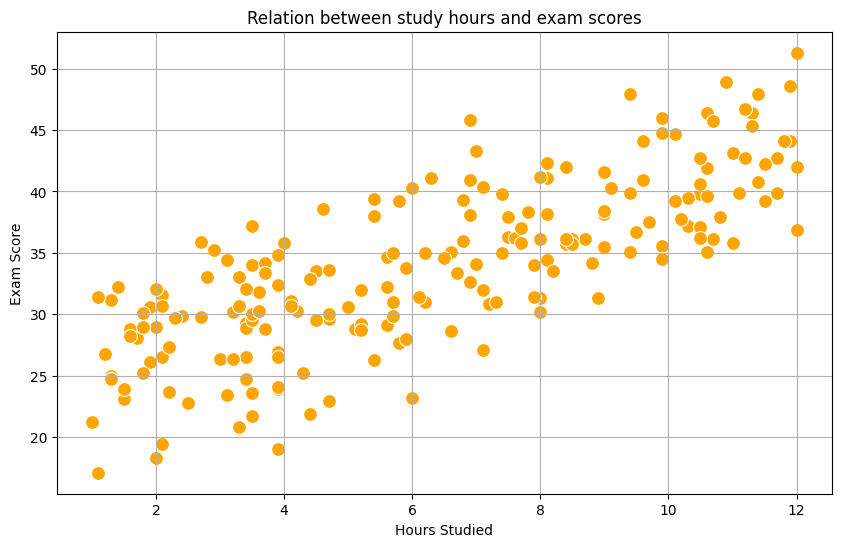

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='hours_studied', y='exam_score',color='orange', s=100)
plt.title('Relation between study hours and exam scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid()
plt.show()


In [69]:
# Get correlation between hours_studied and exam_score
correlation = df['hours_studied'].corr(df['exam_score'])
print(f"Correlation between hours studied and exam score: {correlation:.4f}")


Correlation between hours studied and exam score: 0.7768


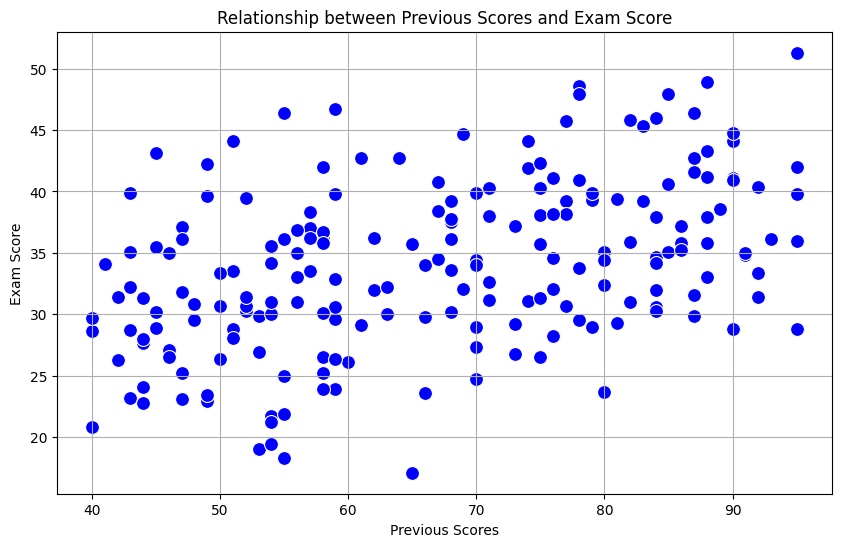

In [82]:
# relation between previous scores and exam score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='previous_scores', y='exam_score', color='blue', s=100)
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Relationship between Previous Scores and Exam Score')
plt.grid()
plt.show()


Correlation between previous scores and exam score: 0.4311


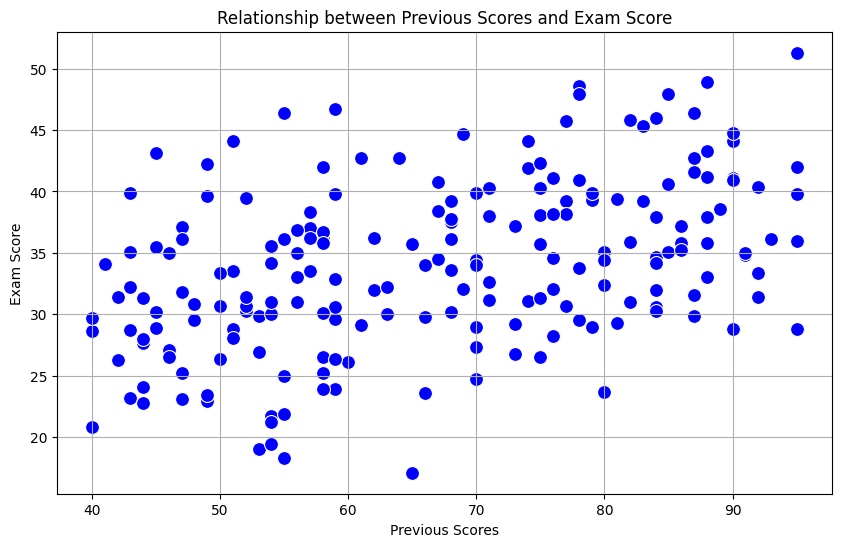

In [83]:
# Calculate correlation between previous scores and exam score
correlation_prev = df['previous_scores'].corr(df['exam_score'])
print(f"Correlation between previous scores and exam score: {correlation_prev:.4f}")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='previous_scores', y='exam_score', color='blue', s=100)
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Relationship between Previous Scores and Exam Score')
plt.grid()
plt.show()

Factors ranked by influence on exam scores:
hours_studied: 0.7768
previous_scores: 0.4311
attendance_percent: 0.2257
sleep_hours: 0.1882


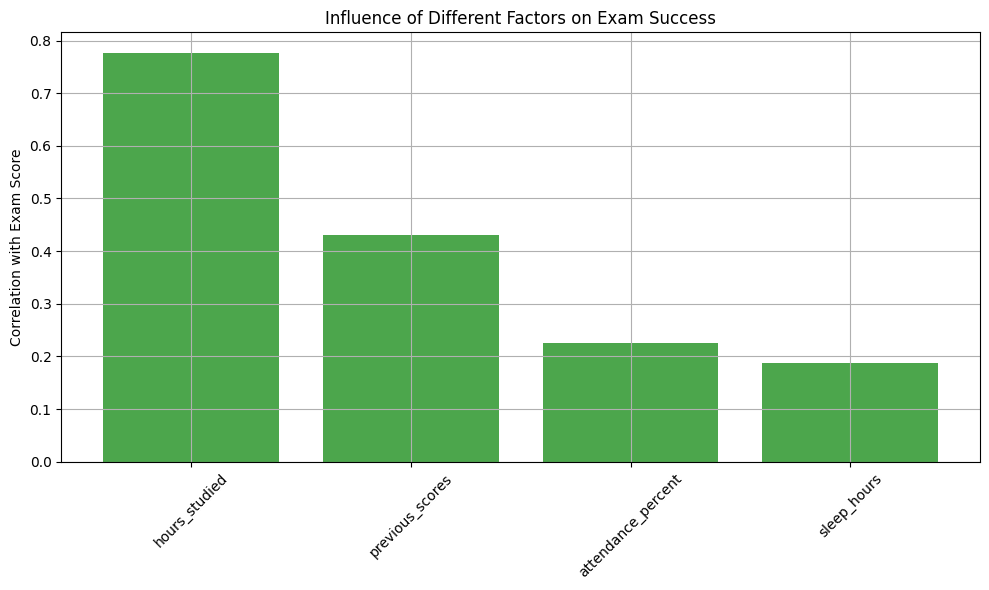


Most influential factor:hours_studied (correlation: 0.7768)


In [72]:
# Extract correlations with exam_score (excluding self-correlation)
factors = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
correlations_with_exam = correlation_matrix['exam_score'][factors]

# Sort by absolute correlation values to find most influential factors
correlations_sorted = correlations_with_exam.reindex(correlations_with_exam.abs().sort_values(ascending=False).index)

print("Factors ranked by influence on exam scores:")
print("=" * 45)
for factor, corr in correlations_sorted.items():
    print(f"{factor}: {corr:.4f}")
    

# Visualize the correlations
plt.figure(figsize=(10, 6))
colors = ['green' if val > 0 else 'red' for val in correlations_sorted.values]
bars=plt.bar(range(len(correlations_sorted)), correlations_sorted.values, color=colors, alpha=0.7)
plt.xticks(range(len(correlations_sorted)), correlations_sorted.index, rotation=45)
plt.ylabel('Correlation with Exam Score')
plt.title('Influence of Different Factors on Exam Success')
plt.grid()

plt.tight_layout()
plt.show()

print(f"\nMost influential factor:{correlations_sorted.index[0]} (correlation: {correlations_sorted.iloc[0]:.4f})")

C:\Users\Raghav\AppData\Local\Temp\ipykernel_17164\2726018006.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='balance_zone', y='exam_score', palette=colors_map, ax=axes[1])


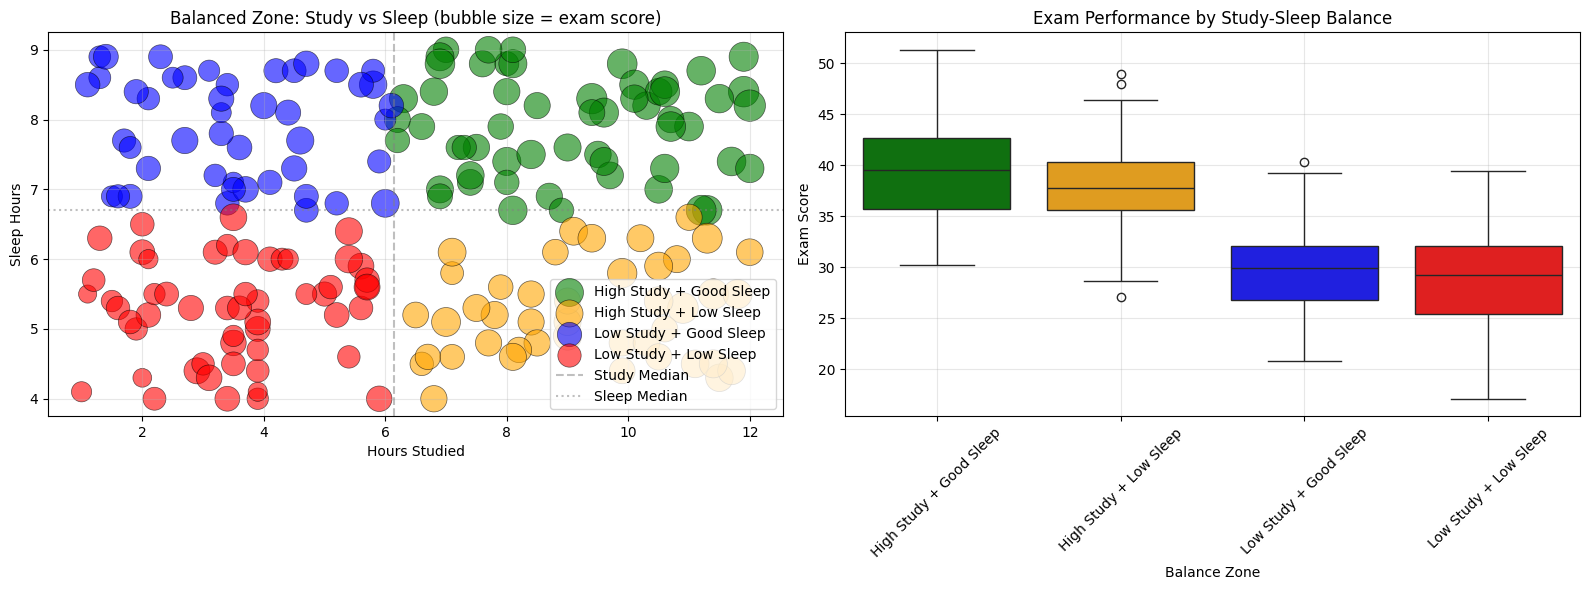

In [73]:
# Find the balanced zone between study hours and sleep hours

study_threshold = df['hours_studied'].median()
sleep_threshold = df['sleep_hours'].median()

# subcategories
df['study_category'] = df['hours_studied'].apply(lambda x: 'High Study' if x >= study_threshold else 'Low Study')
df['sleep_category'] = df['sleep_hours'].apply(lambda x: 'Good Sleep' if x >= sleep_threshold else 'Low Sleep')
df['balance_zone'] = df['study_category'] + ' + ' + df['sleep_category']

#  exam scores across different balance zones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot with balance zones
colors_map={
    'High Study + Good Sleep': 'green',
    'High Study + Low Sleep': 'orange',
    'Low Study + Good Sleep': 'blue',
    'Low Study + Low Sleep': 'red'
}

# Add scatter plot for each balance zone
for zone, color in colors_map.items():
    zone_data = df[df['balance_zone'] == zone]
    axes[0].scatter(zone_data['hours_studied'], zone_data['sleep_hours'], 
                   s=zone_data['exam_score']*10, c=color, alpha=0.6, 
                   label=zone, edgecolors='black', linewidth=0.5)

axes[0].axvline(study_threshold, color='gray', linestyle='--', alpha=0.5, label='Study Median')
axes[0].axhline(sleep_threshold, color='gray', linestyle=':', alpha=0.5, label='Sleep Median')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Sleep Hours')
axes[0].set_title('Balanced Zone: Study vs Sleep (bubble size = exam score)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Box plot comparing exam scores across zones
zone_order = ['High Study + Good Sleep', 'High Study + Low Sleep', 
              'Low Study + Good Sleep', 'Low Study + Low Sleep']
df['balance_zone'] = pd.Categorical(df['balance_zone'], categories=zone_order, ordered=True)

sns.boxplot(data=df, x='balance_zone', y='exam_score', palette=colors_map, ax=axes[1])
axes[1].set_xlabel('Balance Zone')
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Exam Performance by Study-Sleep Balance')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)


plt.tight_layout()
plt.show()

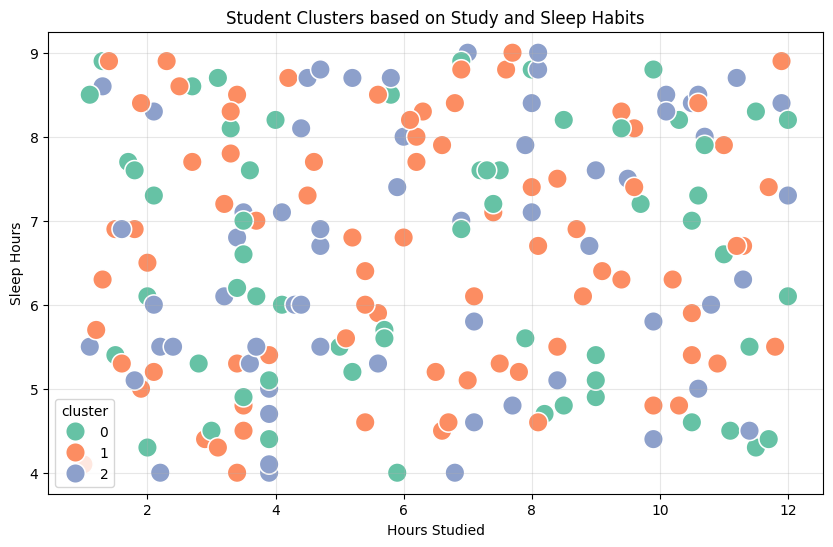

In [74]:
# clustering the students based on their habits(sleep/attendance/score)

clustering_features = df[['hours_studied', 'sleep_hours', 'attendance_percent', 'exam_score']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_features)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='hours_studied', y='sleep_hours', hue='cluster',palette='Set2',s=200)
plt.title('Student Clusters based on Study and Sleep Habits')
plt.xlabel('Hours Studied')
plt.ylabel('Sleep Hours')
plt.grid(alpha=0.3)
plt.show()


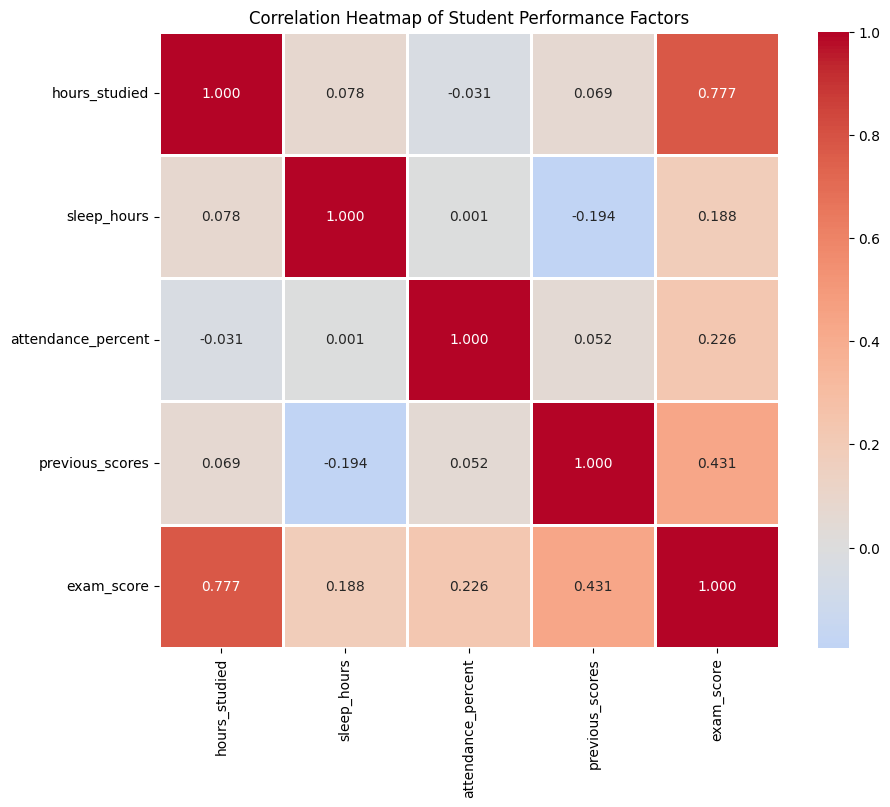

In [75]:
# visaulize which habits most influence high scores 

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f', linewidths=1)
plt.title('Correlation Heatmap of Student Performance Factors')
plt.show()


Number of At-Risk Students: 46

At-Risk Students Details:
    student_id  hours_studied  sleep_hours  exam_score
3         S004            3.5          4.8        34.0
7         S008            2.0          4.3        18.3
10        S011            3.4          5.3        29.3
12        S013            1.3          6.3        31.2
13        S014            3.2          6.1        30.2
19        S020            1.1          5.5        17.1
26        S027            2.0          6.5        29.0
34        S035            5.2          5.2        32.0
44        S045            1.9          5.0        26.1
46        S047            2.1          5.2        31.6
47        S048            4.1          6.0        31.1
49        S050            5.0          5.5        30.6
50        S051            5.1          5.6        28.8
52        S053            3.9          4.4        26.9
58        S059            2.8          5.3        33.0
69        S070            3.9          4.0        23.9
75     

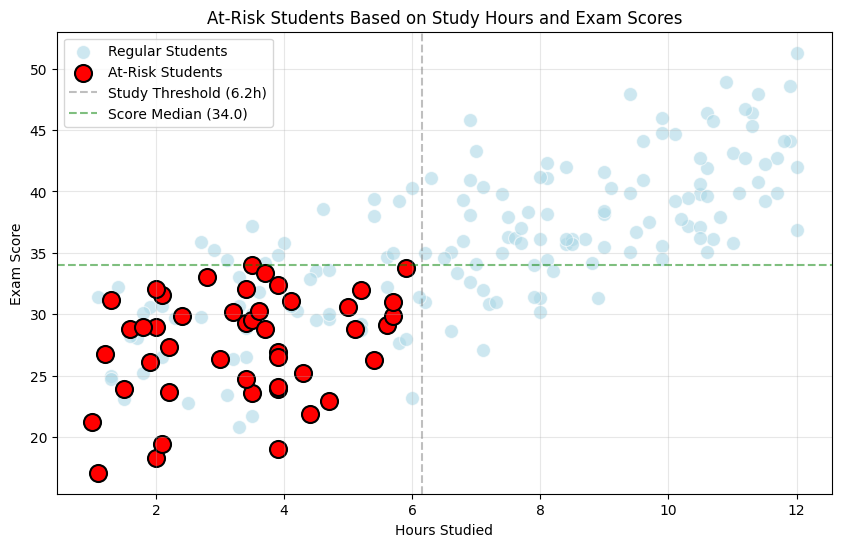

In [76]:
# highlight at risk students based on trends 
at_risk_students = df[(df['hours_studied'] < study_threshold) & (df['sleep_hours'] < sleep_threshold) & (df['exam_score'] < df['exam_score'].median())]
print(f"Number of At-Risk Students: {len(at_risk_students)}")
print("\nAt-Risk Students Details:")
print(at_risk_students[['student_id', 'hours_studied', 'sleep_hours', 'exam_score']])

plt.figure(figsize=(10,6))
# all students
sns.scatterplot(data=df, x='hours_studied', y='exam_score', color='lightblue', s=100, label='Regular Students', alpha=0.6)
#  at-risk students in red
sns.scatterplot(data=at_risk_students, x='hours_studied', y='exam_score', color='red', s=150, label='At-Risk Students', edgecolor='black', linewidth=1.5)
plt.axvline(study_threshold, color='gray', linestyle='--', alpha=0.5, label=f'Study Threshold ({study_threshold:.1f}h)')
plt.axhline(df['exam_score'].median(), color='green', linestyle='--', alpha=0.5, label=f'Score Median ({df["exam_score"].median():.1f})')
plt.title('At-Risk Students Based on Study Hours and Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# 🧑‍🎓 Student Exam Scores Analysis 

## 📊Data Cleaning

Converted the data into a dataframe for the procedure an application of the python libraries 
### Null values
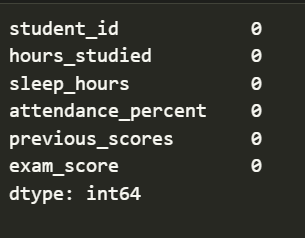

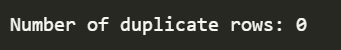


### 📈 Information about the number of rows and columns of the data
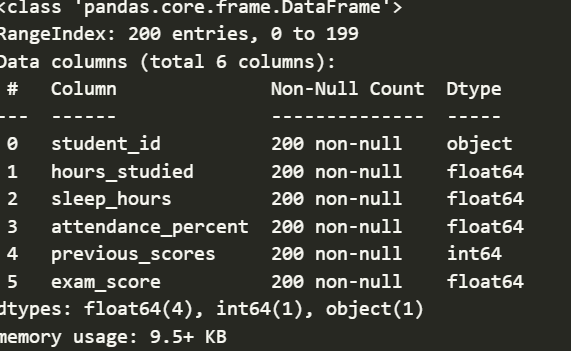

### Statistical info of the data
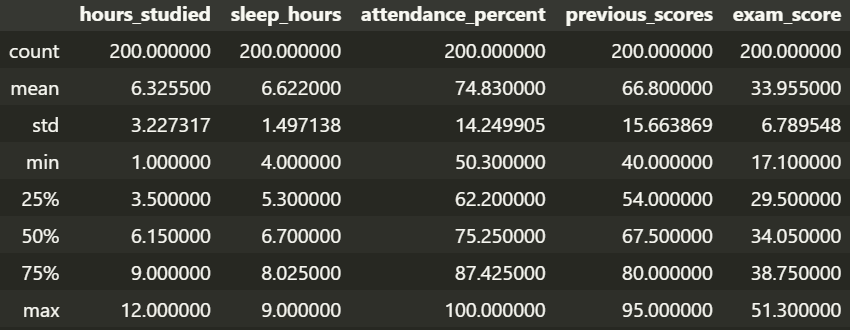



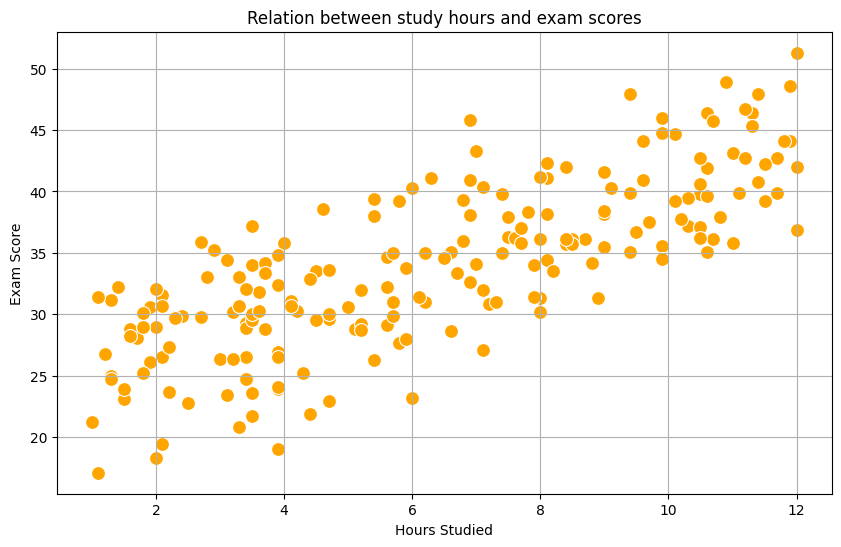

Correlation between hours studied and exam score: 0.7768

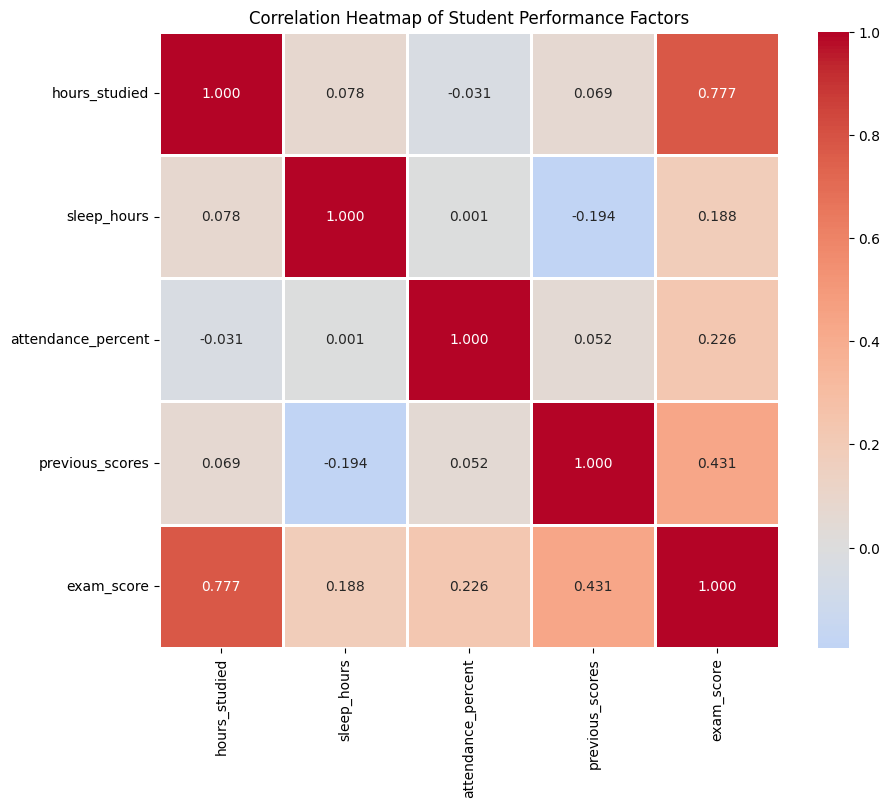


Correlation between previous scores and exam score: 0.4311

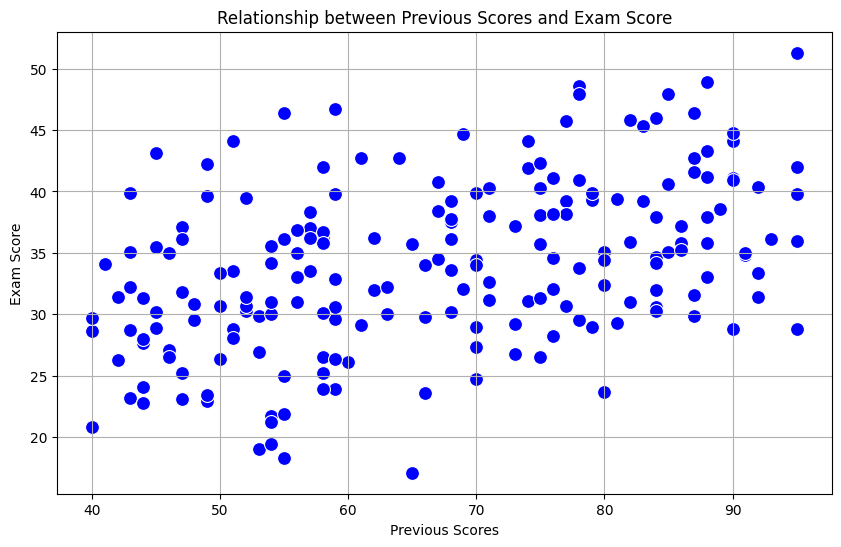

Factors ranked by influence on exam scores:
=============================================
hours_studied: 0.7768

previous_scores: 0.4311

attendance_percent: 0.2257

sleep_hours: 0.1882

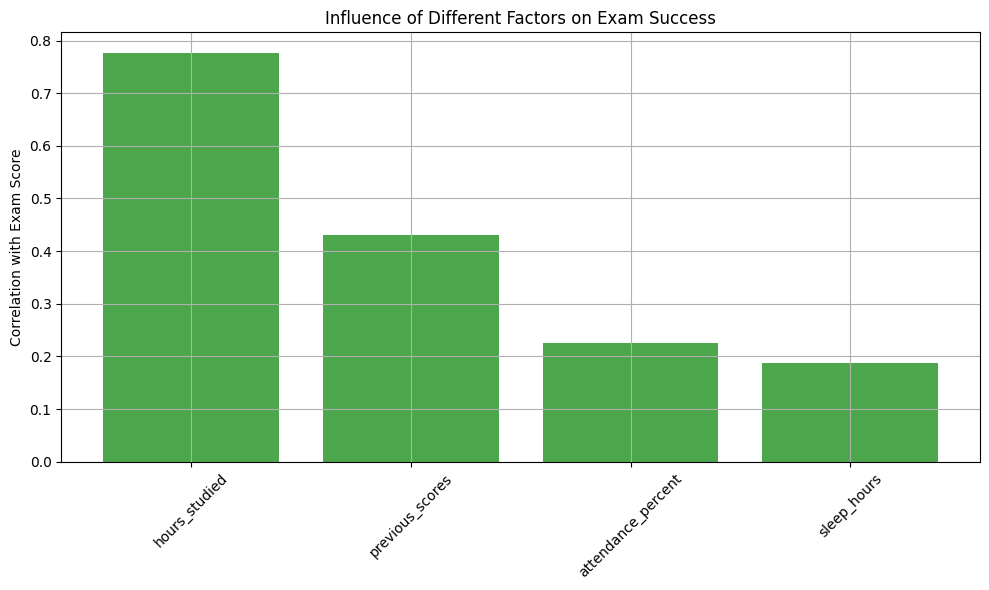


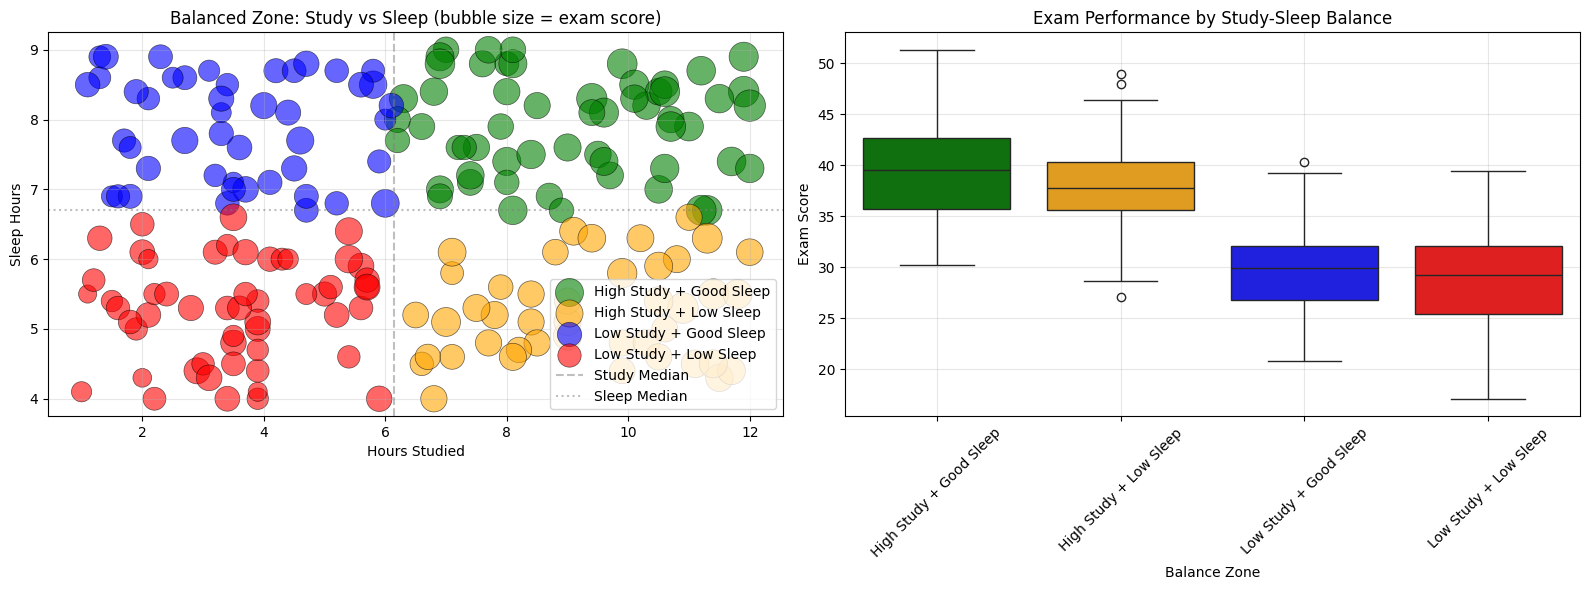

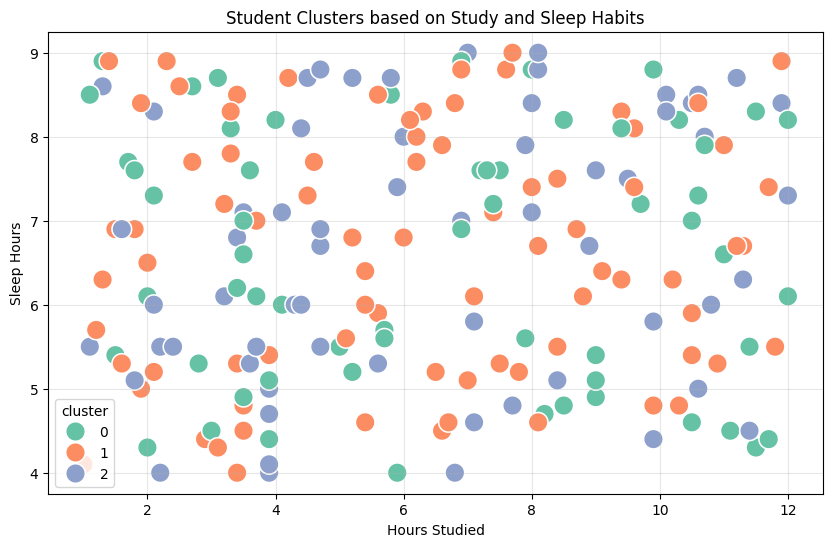

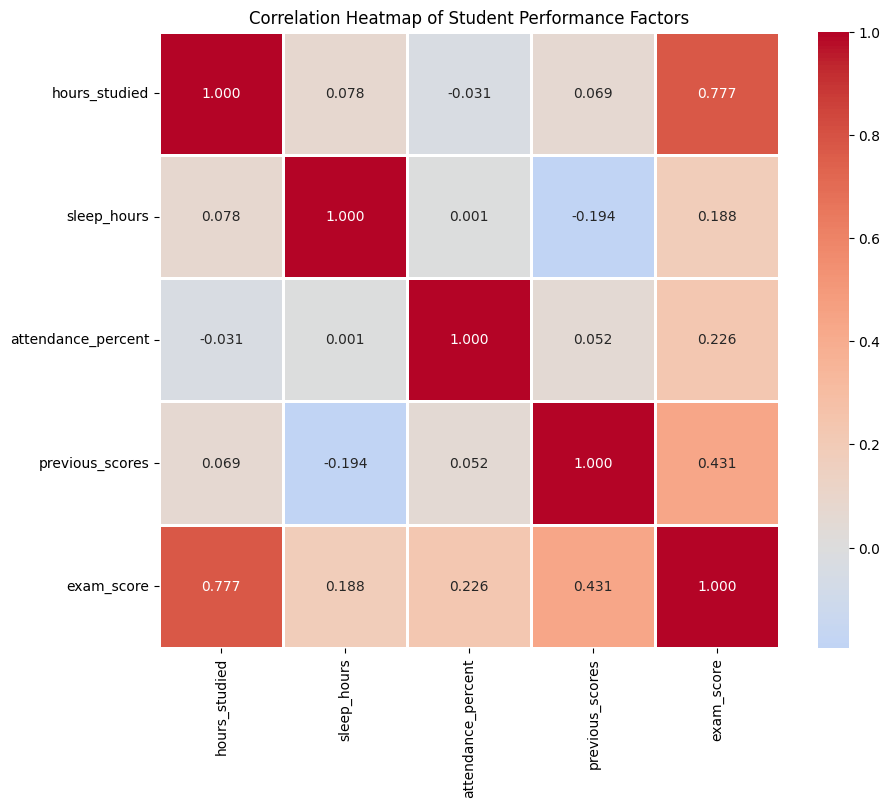

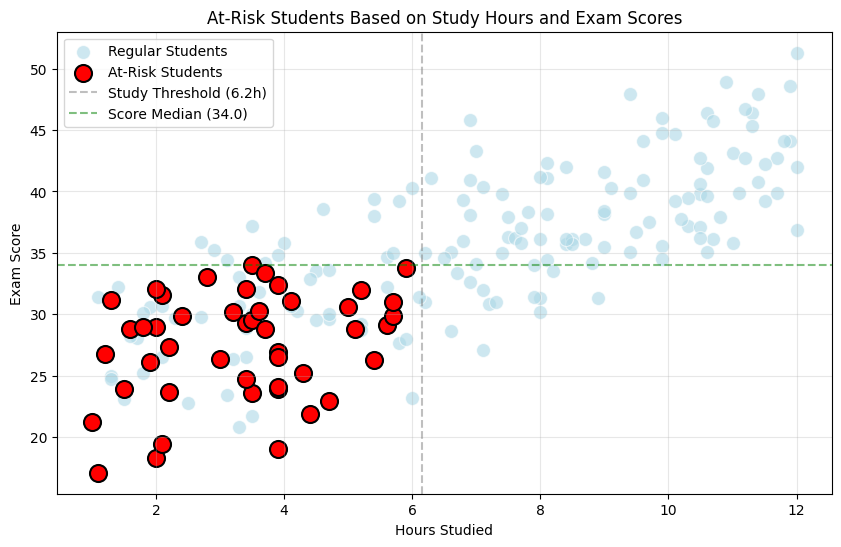

## 🔑Key Findings

The dataset contains 200 students with 6 variables tracking their study habits and performance. The analysis reveals several important insights:

- **Hours studied** is the strongest predictor of exam success (correlation: 0.7768)
- **Previous scores** also show moderate correlation (0.4311) with exam performance
- **46 students** were identified as "at-risk" based on low study hours, poor sleep, and below-median exam scores
- Students can be clustered into 3 distinct groups based on their study and sleep patterns

## Recommendations

1. **Focus on study time**: Increasing study hours shows the strongest correlation with improved exam scores
2. **Monitor at-risk students**: 23% of students need additional support and intervention
3. **Balance approach**: While study hours are crucial, maintaining adequate sleep (6.7+ hours) also contributes to better performance
4. **Targeted interventions**: Students in the "Low Study + Low Sleep" category require immediate attention